### Importação dos dados



In [62]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## 1. Análise do faturamento



In [63]:
lojas=loja1,loja2,loja3,loja4
faturamentos=[]

for loja in lojas:
    faturamentos.append(loja.Preço.sum())

In [64]:
for loja in lojas:
    print(loja.isnull().sum())

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                   

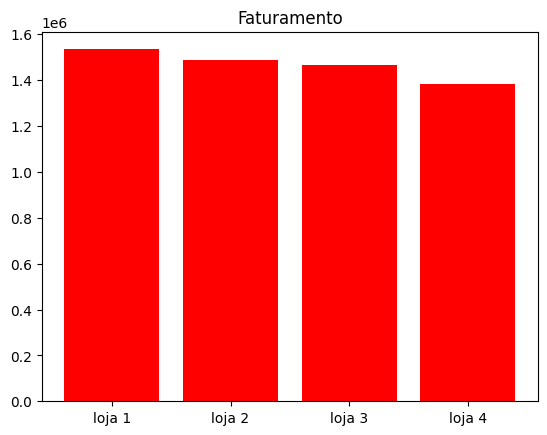

A Loja 1 faturou R$1534509.12
A Loja 2 faturou R$1488459.06
A Loja 3 faturou R$1464025.03
A Loja 4 faturou R$1384497.58


In [65]:
plt.bar(('loja 1','loja 2','loja 3','loja 4'),faturamentos,color='red')
plt.title('Faturamento')
plt.show()

for i in range(4):
    print(f'A Loja {i+1} faturou R${faturamentos[i]}')

# 2. Vendas por Categoria

In [66]:

loja1['Categoria do Produto'].unique()
loja1.groupby('Categoria do Produto')[['Preço']].sum()

,Preço
Categoria do Produto,
brinquedos,23993.78
eletrodomesticos,484913.36
eletronicos,572659.23
esporte e lazer,52387.55
instrumentos musicais,121731.69
livros,11713.92
moveis,250178.11
utilidades domesticas,16931.48


In [67]:
lista_faturamentos=[]
nome_lojas=('Loja 1','Loja 2','Loja 3','Loja 4')

for loja,nome in zip(lojas,nome_lojas):
    categorias=loja.groupby('Categoria do Produto')[['Preço']].sum()
    categorias_rename=categorias.rename(columns={'Preço':nome})
    lista_faturamentos.append(categorias_rename)

vendasCategorias=pd.concat(lista_faturamentos,axis=1)
vendasCategorias

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
eletronicos,572659.23,547773.71,547699.92,545966.86
esporte e lazer,52387.55,46326.09,47456.10,44465.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
livros,11713.92,13454.35,12664.70,12427.77
moveis,250178.11,235234.68,268095.56,256705.65
utilidades domesticas,16931.48,19662.86,20080.21,20098.83


# 3. Média de Avaliação das Lojas


# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja